In [1]:
%matplotlib inline

from pysal.lib import weights
from pysal.lib import cg as geometry
import contextily
import geopandas
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

D:\Anaconda\envs\gis\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.0-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [8]:
# Generate a 3x3 grid of points
l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)

# Generate polygons
polys = [Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)]) for x, y in zip(xs.flatten(), ys.flatten())]
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame({'geometry': polys, 
                        'id': [f'P-{i}' for i in range(len(polys))]})
gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-0
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-1
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-2
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-3
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-4
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-5
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-6
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-7
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-8


['P-0', 'P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'P-7', 'P-8']

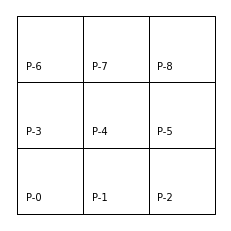

In [16]:
ax = gdf.plot(facecolor='w', edgecolor='k')
for p, t in zip(polys, gdf['id'].tolist()):
    plt.text(p.centroid.x-.25, p.centroid.y-.25, t, verticalalignment='center', horizontalalignment='center') 
ax.set_axis_off()
plt.show()

In [17]:
# do a regular 3x3 lattice and draw it here
w = weights.contiguity.Rook.from_dataframe(gdf)
w.neighbors

{0: [1, 3],
 1: [0, 2, 4],
 2: [1, 5],
 3: [0, 4, 6],
 4: [1, 3, 5, 7],
 5: [8, 2, 4],
 6: [3, 7],
 7: [8, 4, 6],
 8: [5, 7]}

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

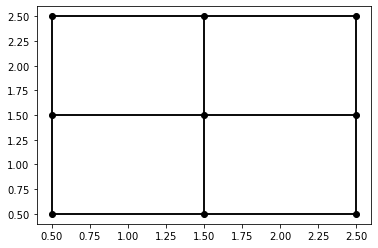

In [29]:
w.plot(gdf)

In [23]:
w.cardinalities

{0: 2, 1: 3, 2: 2, 3: 3, 4: 4, 5: 3, 6: 2, 7: 3, 8: 2}

In [24]:
w.histogram

[(2, 4), (3, 4), (4, 1)]

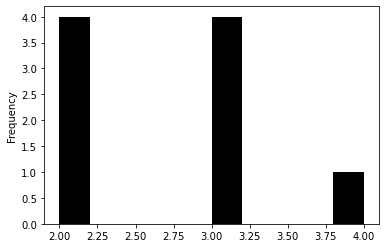

In [27]:
pandas.Series(w.cardinalities).plot.hist(color='k')